In [1]:
import pandas as pd
import numpy as np
import fbprophet as ph
import matplotlib.pyplot as plt
import datetime
%matplotlib inline 

In [50]:
folderName  = "datasets"
fileName = "RefBldgHospitalNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv"
dataSource = folderName + "/" + fileName
print(dataSource)

datasets/RefBldgHospitalNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv


In [51]:
dataset = pd.read_csv(dataSource)

In [48]:
dataset.shape

(8760, 11)

In [5]:
dataset.head(5)

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly)
0,01/01 01:00:00,778.007969,102.087533,409.661494,0.0,34.961655,113.31278,645.486394,631.103360,5.66467,8.718364
1,01/01 02:00:00,776.241750,102.087533,412.574797,0.0,34.961655,113.31278,658.620281,635.539107,5.66467,17.416503
2,01/01 03:00:00,779.357338,102.087533,412.809061,0.0,34.961655,113.31278,667.231362,644.151710,5.66467,17.414982
3,01/01 04:00:00,778.737196,102.087533,410.759535,0.0,34.961655,113.31278,667.086263,652.702863,5.66467,8.718730
4,01/01 05:00:00,787.835835,102.087533,406.741771,0.0,44.493766,113.31278,675.246367,652.164626,5.66467,17.417071


In [6]:
dataset.tail()

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly)
8755,12/31 20:00:00,845.563081,102.087533,427.701530,0.0,44.493766,155.957040,564.589765,490.528152,56.646700,17.414913
8756,12/31 21:00:00,827.530521,102.087533,442.143380,0.0,44.493766,124.558693,595.894255,530.528860,56.646700,8.718695
8757,12/31 22:00:00,829.256300,102.087533,446.967345,0.0,44.493766,124.558693,605.592228,545.690220,42.485025,17.416983
8758,12/31 23:00:00,813.937205,102.087533,442.520037,0.0,34.961655,124.558693,610.512442,564.773749,28.323350,17.415343
8759,12/31 24:00:00,815.588584,102.087533,442.359770,0.0,34.961655,124.558693,590.079821,567.199220,14.161675,8.718926


In [7]:
dataset.columns
# Note : Ds = Date, y = Views

Index([u'Date/Time', u'Electricity:Facility [kW](Hourly)',
       u'Fans:Electricity [kW](Hourly)', u'Cooling:Electricity [kW](Hourly)',
       u'Heating:Electricity [kW](Hourly)',
       u'InteriorLights:Electricity [kW](Hourly)',
       u'InteriorEquipment:Electricity [kW](Hourly)',
       u'Gas:Facility [kW](Hourly)', u'Heating:Gas [kW](Hourly)',
       u'InteriorEquipment:Gas [kW](Hourly)',
       u'Water Heater:WaterSystems:Gas [kW](Hourly)'],
      dtype='object')

In [8]:
dataset = dataset[['Date/Time', 'Electricity:Facility [kW](Hourly)', 'Gas:Facility [kW](Hourly)']]

In [9]:
df_electric = dataset[['Date/Time', 'Electricity:Facility [kW](Hourly)']]

In [10]:
df_gas = dataset[['Date/Time',  'Gas:Facility [kW](Hourly)']]

In [11]:
#Renaming Columns for simplicity
df_electric.rename(columns={'Date/Time': 'ds', 'Electricity:Facility [kW](Hourly)': 'y'}, inplace=True)
df_gas.rename(columns={'Date/Time': 'ds', 'Gas:Facility [kW](Hourly)': 'y'}, inplace=True)

/usr/local/lib/python2.7/dist-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [12]:
df_electric

,ds,y
0,01/01 01:00:00,778.007969
1,01/01 02:00:00,776.241750
2,01/01 03:00:00,779.357338
3,01/01 04:00:00,778.737196
4,01/01 05:00:00,787.835835
5,01/01 06:00:00,786.181354
6,01/01 07:00:00,853.508881
7,01/01 08:00:00,859.135138
8,01/01 09:00:00,928.745915
9,01/01 10:00:00,918.674958


In [13]:
# Note This dataset belong to year 2004 
# If you try to use the "Ds" column as "datetime you will get the following error:
# Try:    df['Ds'] = pd.to_datetime(df['Ds'])
# Error:  OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-01-01 01:00:00
#
# So we need to change this date properly to set the year.
# .index.map(lambda t: t.replace(year=2004))
#df['Ds'] = df['Ds'].replace(year=2004)

 
def modify_date(row):
    return row[:6] + '/2004' + row[6:].replace('24:', '00:')

In [14]:
df_electric['ds'] = df_electric['ds'].apply(modify_date)
df_gas['ds'] = df_gas['ds'].apply(modify_date)

/home/avkash/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/avkash/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [15]:
print(df_gas['ds'].head())
print(df_gas['ds'].tail())

0     01/01/2004  01:00:00
1     01/01/2004  02:00:00
2     01/01/2004  03:00:00
3     01/01/2004  04:00:00
4     01/01/2004  05:00:00
Name: ds, dtype: object
8755     12/31/2004  20:00:00
8756     12/31/2004  21:00:00
8757     12/31/2004  22:00:00
8758     12/31/2004  23:00:00
8759     12/31/2004  00:00:00
Name: ds, dtype: object


In [16]:
print(df_electric['ds'].head())
print(df_electric['ds'].tail())

0     01/01/2004  01:00:00
1     01/01/2004  02:00:00
2     01/01/2004  03:00:00
3     01/01/2004  04:00:00
4     01/01/2004  05:00:00
Name: ds, dtype: object
8755     12/31/2004  20:00:00
8756     12/31/2004  21:00:00
8757     12/31/2004  22:00:00
8758     12/31/2004  23:00:00
8759     12/31/2004  00:00:00
Name: ds, dtype: object


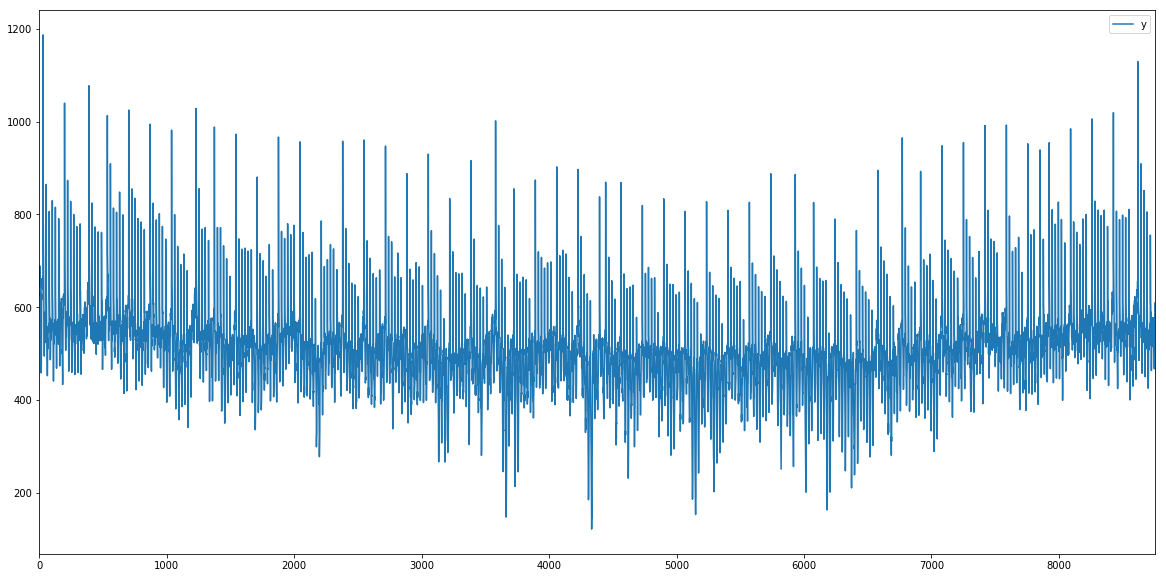

In [17]:
df_gas.plot(figsize  = (20,10))

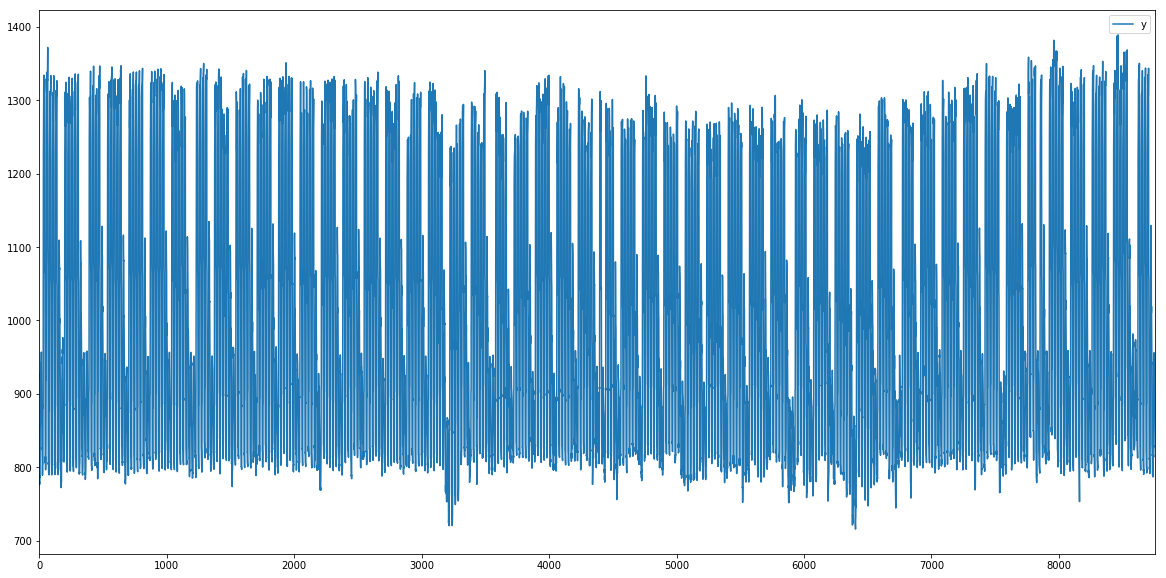

In [18]:
df_electric.plot(figsize  = (20,10))

In [19]:
df_gas['y'] = np.log(df_gas['y'])
print(np.power(np.e,df_gas['y'][0]))

645.486393693


/home/avkash/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [20]:
df_electric['y'] = np.log(df_electric['y'])
print(np.power(np.e,df_electric['y'][0]))

778.007969062


/home/avkash/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [21]:
# Converting datetime values which are object to actual datetime
df_electric['ds'] = pd.to_datetime(df_electric['ds'])
df_gas['ds'] = pd.to_datetime(df_gas['ds'])

/home/avkash/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/avkash/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [22]:
# Confirming date/time values for actual date/time type
print(df_electric['ds'].head())
print(df_gas['ds'].head())

0   2004-01-01 01:00:00
1   2004-01-01 02:00:00
2   2004-01-01 03:00:00
3   2004-01-01 04:00:00
4   2004-01-01 05:00:00
Name: ds, dtype: datetime64[ns]
0   2004-01-01 01:00:00
1   2004-01-01 02:00:00
2   2004-01-01 03:00:00
3   2004-01-01 04:00:00
4   2004-01-01 05:00:00
Name: ds, dtype: datetime64[ns]


In [23]:
print(df_gas.shape)
print(df_electric.shape)

(8760, 2)
(8760, 2)


In [24]:
# Training for gas first
m_gas = ph.Prophet()
m_gas.fit(df_gas)

In [25]:
# Training for electric next
m_electric = ph.Prophet()
m_electric.fit(df_electric)

In [26]:
m_gas.history

,ds,y,t,y_scaled
23,2004-01-01 00:00:00,6.490755,0.000000,0.916907
0,2004-01-01 01:00:00,6.470004,0.000114,0.913975
1,2004-01-01 02:00:00,6.490147,0.000228,0.916821
2,2004-01-01 03:00:00,6.503137,0.000342,0.918656
3,2004-01-01 04:00:00,6.502919,0.000455,0.918625
4,2004-01-01 05:00:00,6.515078,0.000569,0.920343
5,2004-01-01 06:00:00,6.534542,0.000683,0.923092
6,2004-01-01 07:00:00,6.435833,0.000797,0.909148
7,2004-01-01 08:00:00,6.447067,0.000911,0.910735
8,2004-01-01 09:00:00,6.361327,0.001025,0.898623


In [27]:
m_electric.history

,ds,y,t,y_scaled
23,2004-01-01 00:00:00,6.686370,0.000000,0.924001
0,2004-01-01 01:00:00,6.656737,0.000114,0.919906
1,2004-01-01 02:00:00,6.654464,0.000228,0.919591
2,2004-01-01 03:00:00,6.658470,0.000342,0.920145
3,2004-01-01 04:00:00,6.657674,0.000455,0.920035
4,2004-01-01 05:00:00,6.669290,0.000569,0.921640
5,2004-01-01 06:00:00,6.667187,0.000683,0.921350
6,2004-01-01 07:00:00,6.749356,0.000797,0.932705
7,2004-01-01 08:00:00,6.755926,0.000911,0.933613
8,2004-01-01 09:00:00,6.833835,0.001025,0.944379


In [28]:
future_gas = m_gas.make_future_dataframe(freq='H',periods=8760) # Next 24x365 = 8760 hours
forecast_gas= m_gas.predict(future_gas)
forecast_gas[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
17515,2005-12-31 19:00:00,6.356391,6.164095,6.556441
17516,2005-12-31 20:00:00,6.356392,6.139684,6.548715
17517,2005-12-31 21:00:00,6.356392,6.143424,6.556313
17518,2005-12-31 22:00:00,6.356392,6.143179,6.544926
17519,2005-12-31 23:00:00,6.356392,6.149191,6.572015


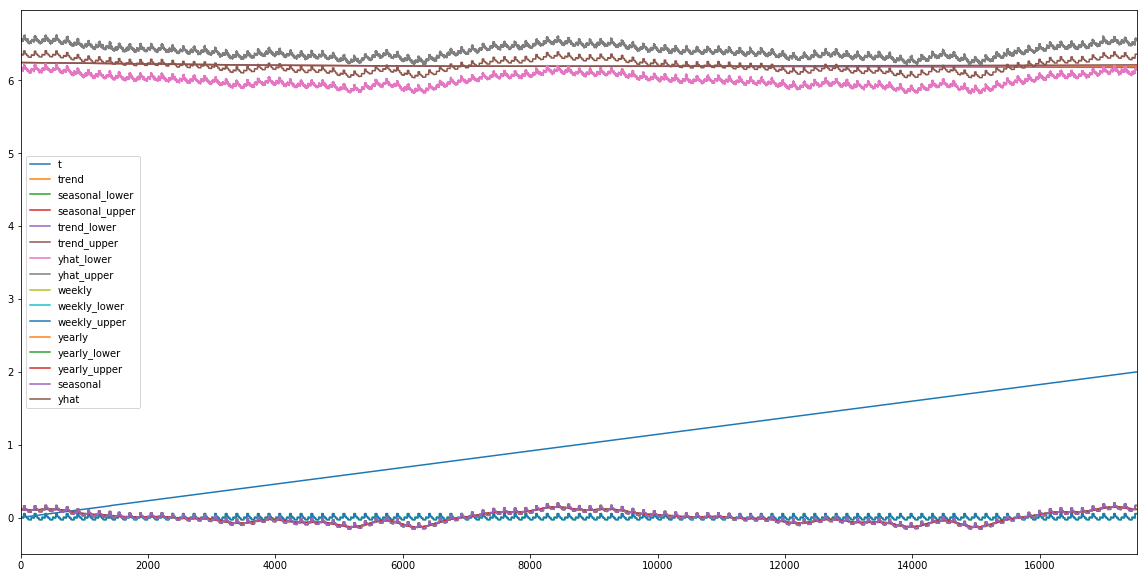

In [30]:
forecast_gas.plot(figsize= (20,10))

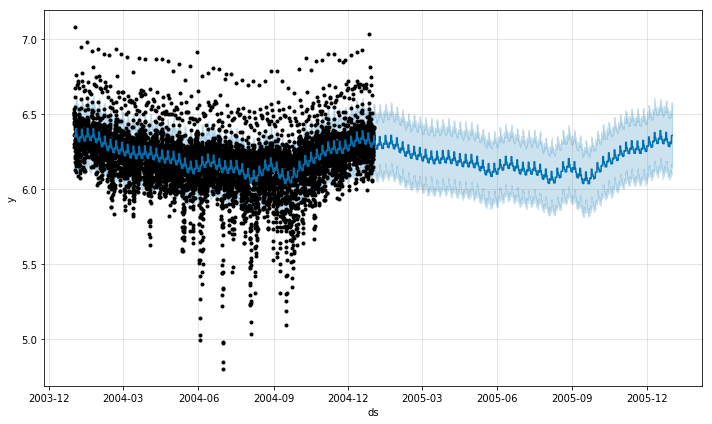

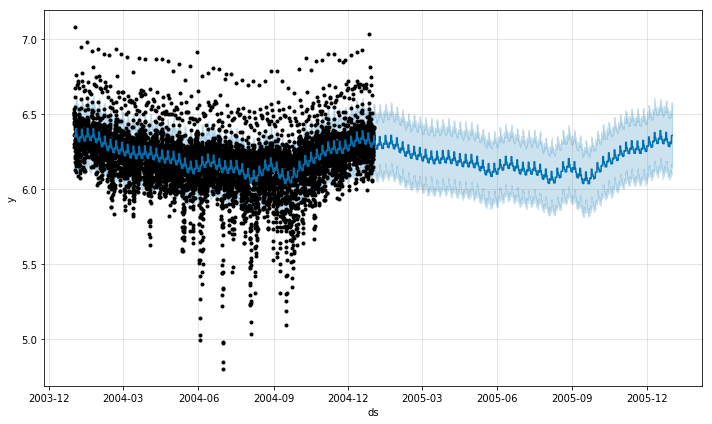

In [31]:
m_gas.plot(forecast_gas)

(17520, 17)
Index([u'ds', u't', u'trend', u'seasonal_lower', u'seasonal_upper',
       u'trend_lower', u'trend_upper', u'yhat_lower', u'yhat_upper', u'weekly',
       u'weekly_lower', u'weekly_upper', u'yearly', u'yearly_lower',
       u'yearly_upper', u'seasonal', u'yhat'],
      dtype='object')


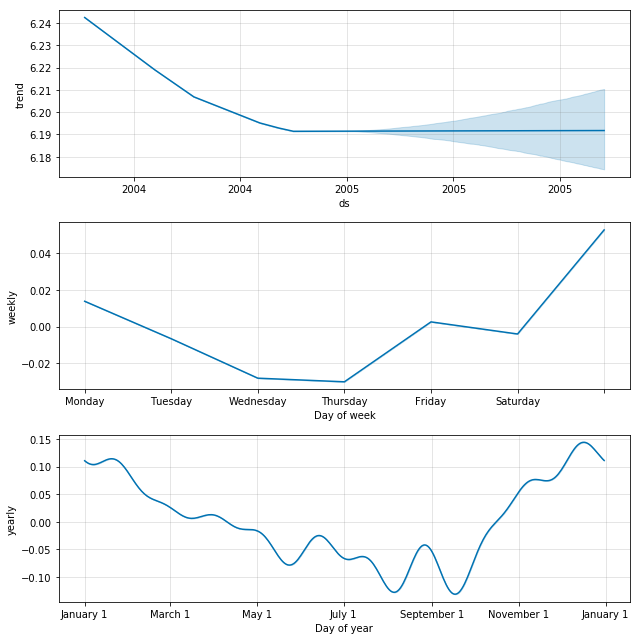

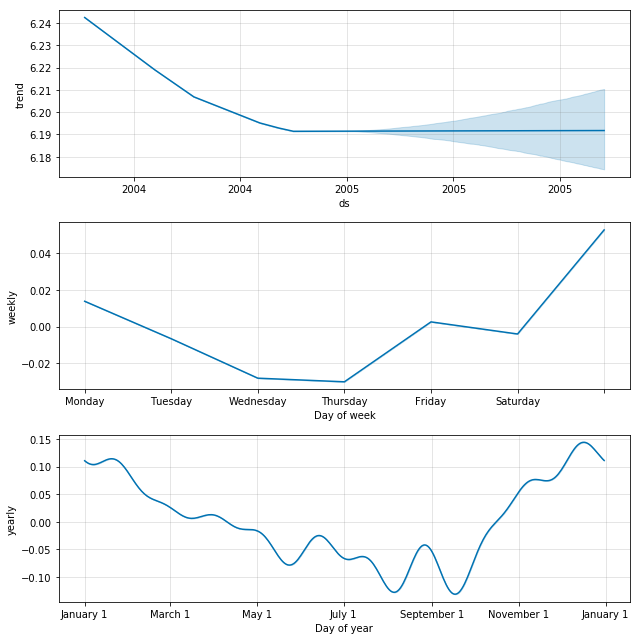

In [32]:
print(forecast_gas.shape)
print(forecast_gas.columns)
m_gas.plot_components(forecast_gas)

# Automatic changepoint detection in Prophet (Finding better scale)

If the trend changes are being overfit (too much flexibility) or underfit (not enough flexiblity), you can adjust the strength of the sparse prior using the input argument changepoint_prior_scale.

# Finding better scale for gas utilization

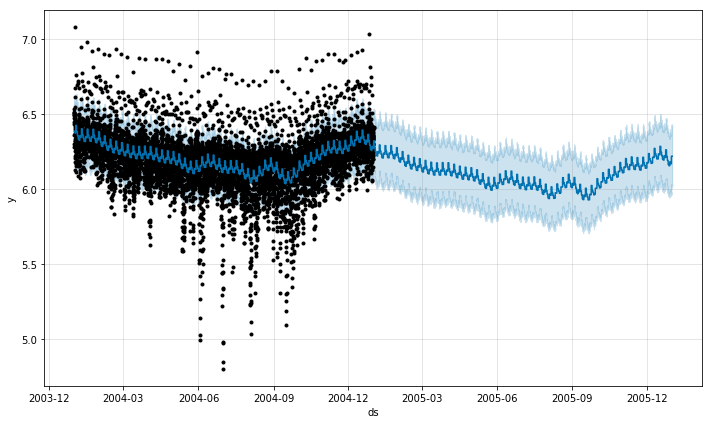

In [38]:
# Setting future for one month
future_gas_ch = m_gas.make_future_dataframe(freq='H', periods=8760)
# The following 0.001 values is taken based on previous experiemnetation
m_gas_ch = ph.Prophet(changepoint_prior_scale=0.001) # default is 0.5
forecast_gas_ch = m_gas_ch.fit(df_gas).predict(future_gas_ch)
m_gas_ch.plot(forecast_gas_ch);

# Working on electric utility

In [40]:
future_electric = m_electric.make_future_dataframe(freq='H',periods=8760) 
forecast_electric= m_electric.predict(future_electric)
forecast_electric[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
17515,2005-12-31 19:00:00,6.902278,6.667719,7.118118
17516,2005-12-31 20:00:00,6.902274,6.679514,7.123470
17517,2005-12-31 21:00:00,6.902270,6.669515,7.141769
17518,2005-12-31 22:00:00,6.902266,6.680966,7.138777
17519,2005-12-31 23:00:00,6.902262,6.668069,7.120844


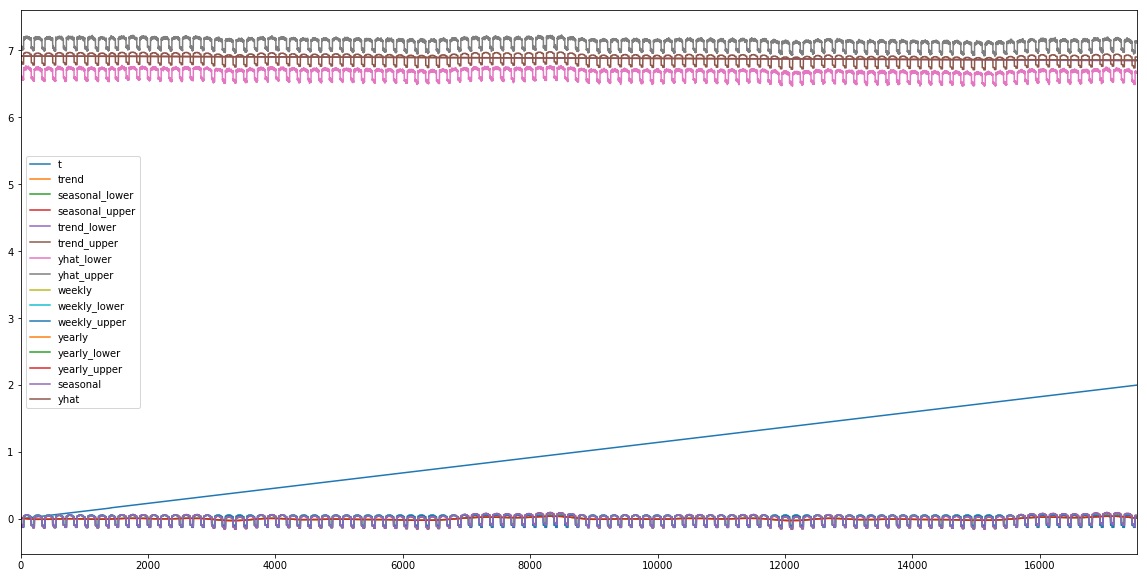

In [41]:
forecast_electric.plot(figsize = (20,10))

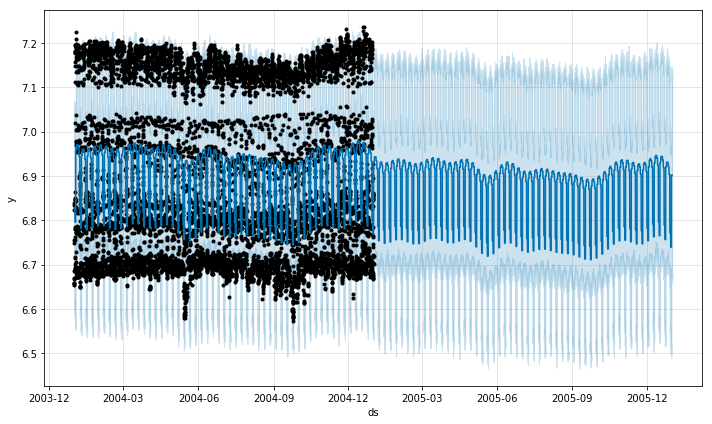

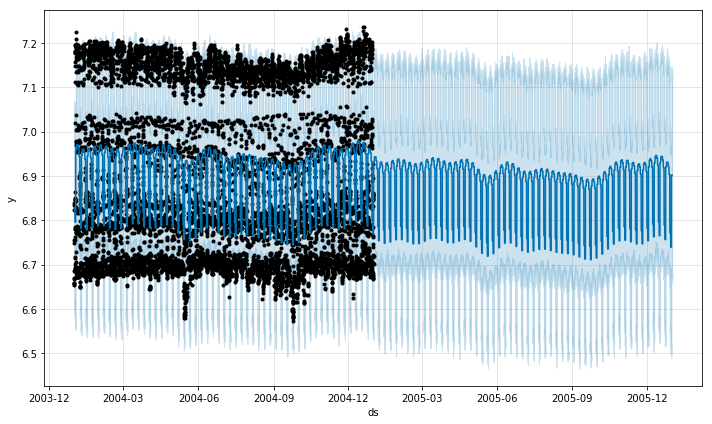

In [42]:
m_electric.plot(forecast_electric)

(17520, 17)
Index([u'ds', u't', u'trend', u'seasonal_lower', u'seasonal_upper',
       u'trend_lower', u'trend_upper', u'yhat_lower', u'yhat_upper', u'weekly',
       u'weekly_lower', u'weekly_upper', u'yearly', u'yearly_lower',
       u'yearly_upper', u'seasonal', u'yhat'],
      dtype='object')


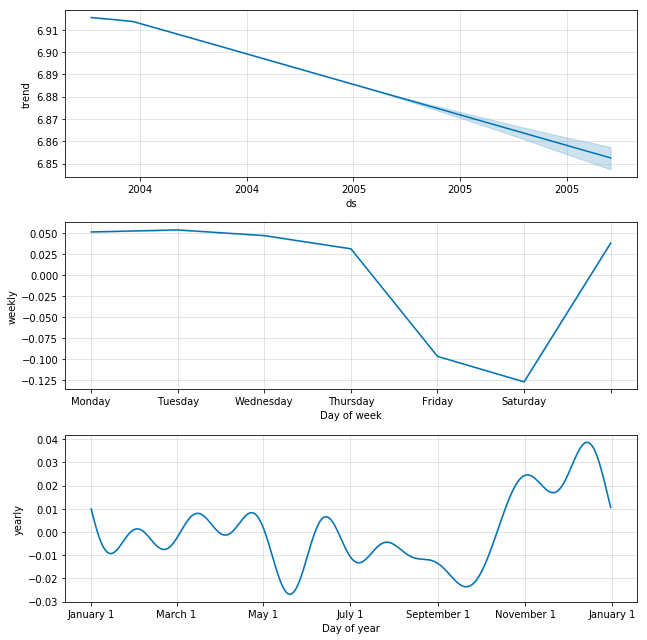

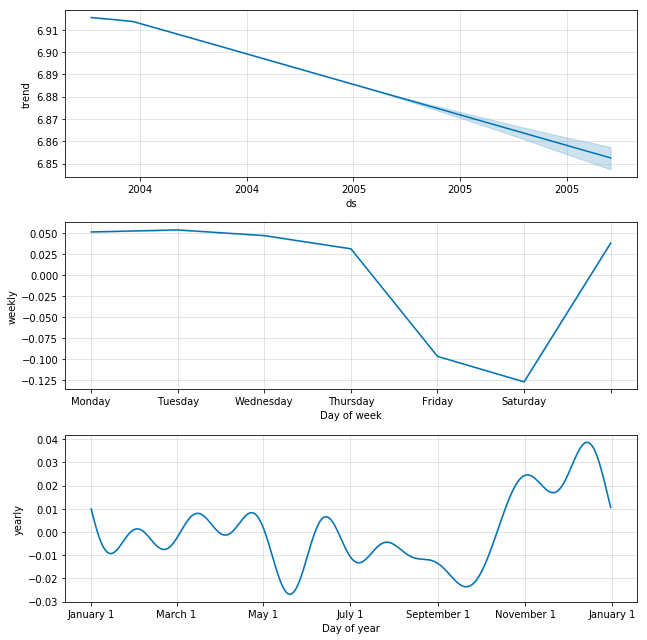

In [43]:
print(forecast_electric.shape)
print(forecast_electric.columns)
m_electric.plot_components(forecast_electric)

# Finding better scale for electric utilization

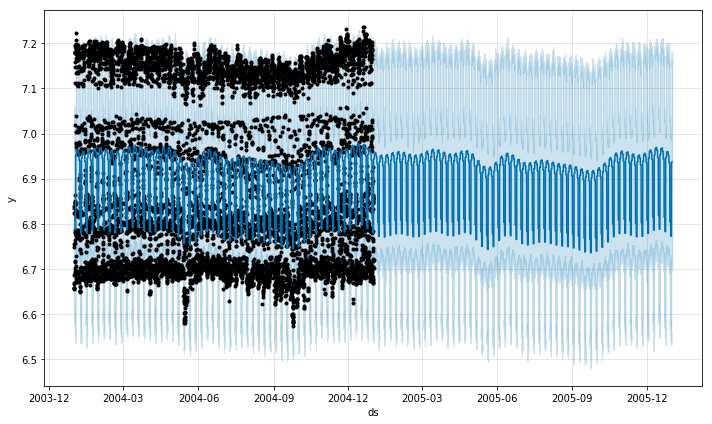

In [45]:
# Setting future for one year
future_electric_ch = m_electric.make_future_dataframe(freq='H', periods=8760) # Next 5 days

#Now adjusting trends for the next month (31 days)
m_electric_ch = ph.Prophet(changepoint_prior_scale=0.001) # default is 0.5
forecast_electric_ch = m_electric_ch.fit(df_electric).predict(future_electric_ch)
m_electric_ch.plot(forecast_electric_ch);